<a href="https://colab.research.google.com/github/MathewsJosh/Resmat/blob/main/Resmat_ex02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resmat Ex 2 <br>
Mathews Edwirds

Uma força vertical P=10lb é aplicada às extremidades da corda AB de 2 pés de comprimento e da mola AC. Se a mola tem comprimento de 2 pés sem deformação. Determine o ângulo theta para equilíbrio. Suponha que k = 15lb/pés.

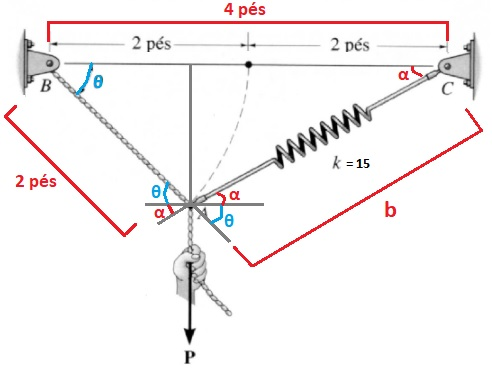

In [ ]:
# Importações necessárias
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Lados do triangulo ABC
a = 2   # Comprimento da corda
c = 4   # Soma do tamanho da corda e da mola sem deformação
P = 10  # Força Peso P

In [ ]:
# Função responsável por calcular o somatorio das forças em Y, seguindo uma variação de theta
def calcula_theta(theta, a=2, c=4, P=10):
  # Lei dos cossenos para encontrar o lado b
  b = np.sqrt(a**2 + c**2 - (2*a*c*np.cos(theta)))

  # Lei dos senos para encontrar o senBeta e cosBeta:   #b/sin(theta) = a/sin(beta)
  senBeta = (a*np.sin(theta))/b
  cosBeta = np.sqrt(1.0-senBeta**2)

  # Força Elastica: Fel = k * deformação da mola
  Fel = 15 * (b - 2)

  # Somatório de forças em X = 0: #Fel*cosBeta - TAB*np.cos(theta) = 0                    (1)
  TAB = (Fel*cosBeta)/np.cos(theta)

  # Somatório de forças em Y = 0: #Fel*np.sin(beta) + TAB*np.sin(theta) - P = 0           (2)
  # Substituindo tudo em (2):
  Y = Fel*senBeta + TAB*np.sin(theta) - P
  
  return Y

In [ ]:
resultado = []
pulo = 0.01
pi = 3.14
intervalo = np.arange(0.0, pi/2, pulo)
for theta in intervalo:
  resultado.append(calcula_theta(theta))
print(resultado)

[-10.0, -9.999940007498585, -9.999520239819011, -9.998381819410415, -9.996167656883417, -9.992523327449806, -9.987097926448046, -9.979544897402569, -9.969522826413433, -9.956696197094884, -9.940736100768865, -9.921320897162644, -9.898136821448231, -9.870878534084207, -9.839249610566691, -9.802962968854027, -9.76174123288855, -9.715317031287706, -9.663433230906353, -9.605843105572886, -9.54231044086661, -9.472609576325228, -9.396525386944692, -9.31385320625385, -9.224398693611473, -9.12797764868065, -9.024415776285478, -8.913548405047258, -8.795220163334324, -8.669284616142559, -8.535603866556517, -8.394048125426842, -8.244495252842611, -8.086830274881711, -7.920944878992703, -7.746736891202644, -7.564109738161151, -7.372971896826736, -7.173236334380366, -6.964819940718144, -6.747642955633033, -6.521628392548386, -6.286701460415999, -6.042788985142083, -5.7898188316569135, -5.527719327500744, -5.256418688560776, -4.975844447362947, -4.68592288409831, -4.386578460348184, -4.0777332552639

In [ ]:
# Buscando a posição do resultado mais próximo do ponto de equilibrio, Y=0
pos_max = 0
def index_mais_proximo(array, value):     
  array = np.asarray(array)
  pos_max = (np.abs(array - value)).argmax()
  idx = (np.abs(array - value)).argmin()
  #if array[idx] < 0:      # Se o num é negativo, seguimos para o próximo num da lista mais proximo de 0
    #return idx+1          # Em alguns casos, o próximo da lista pode ser negativo também, o que pode não representar exatamente o ponto de equilibrio
  return idx
    
pos_min = index_mais_proximo(resultado,0.0)
valor_de_theta = pos_min * pulo
resultado[pos_min], pos_min, valor_de_theta

(-0.02702759909832153, 61, 0.61)

In [ ]:
# Função responsável por plotar os valores de t
def plot_results(x, label, labelX, labelY, title):
    #intervalo = np.arange(0.0, 2*3.14, 0.01)

    plt.figure(figsize = (8, 6))
    
    plt.plot(intervalo, x,'-', label=label)
    plt.xlim(0.0, 1.6)
    plt.ylim(-20,100)       #plt.ylim(np.amin(x) - 10, np.amax(x) + 30)
    plt.axhline(y=0, color="black", linestyle="-")

    plt.annotate('0.611rad \n ou ≅35°', fontsize = 12, xy=(valor_de_theta, 0), xytext=(0.20, 17), arrowprops=dict(facecolor='black', shrink=0.05))
    # Marca o valor de theta que cruza o eixo y = 0 no gráfico

    plt.grid(True)

    # Personalização do gráfico (label, fontes, titulos e subtitulos)
    plt.title(title, fontsize = 15, pad = 20)
    plt.xlabel(labelX, labelpad = 5, fontsize = 12)
    plt.xticks(fontsize = 12)
    plt.ylabel(labelY, labelpad = 2, fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.legend(loc = "best", fontsize = 12, frameon = True)

    plt.show()

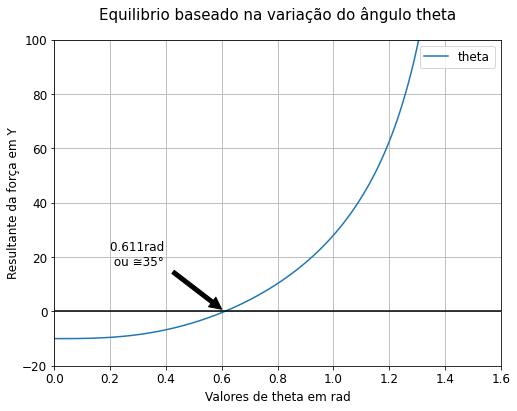

In [ ]:
plot_results(resultado, "theta", "Valores de theta em rad","Resultante da força em Y", "Equilibrio baseado na variação do ângulo theta")